# 확률적 경사 하강법(Stochastic Gradient Descent)

<img src = "./sgd.png">

- 파란 부분이 오차가 제일 작은 부분, 빨간 부분이 오차가 제일 큰 부분 
- 0번 파라미터, 1번 파라미터 

- 의의
    - 1) 훈련 세트에서 샘플을 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘 "확률적 경사 하강법"
    - 2) 샘플을 하나씩 사용하지 않고 여러 개를 사용하면 "미니배치 경사 하강법"
    - 3) 한 번에 전체 샘플을 사용하면 "배치 경사 하강법"
    
- 손실 함수 (loss function)
    - 확률적 경사 하강법이 최적화할 대상 
    - 어떤 문제에서 머신러닝 알고리즘의 예측값이 얼마나 실제값과 오차가 나는지 측정하는 기준 
    - 손실 함수의 최소값을 알 수 없기 떄문에 조금씩 찾아 나가는 과정이 "확률적 경사 하강법" 
    
- 에포크 (epoch)
    - 손실 함수 값을 줄여나가는 과정에서 훈련 세트를 모두 사용하고도 만족할 만한 결과에 도달하지 못했다면 다시 처음부터 훈련 세트를 사용함. 
    - 이렇게 훈련 세트를 한 번 모두 사용하는 과정을 "에포크"라고 부름.
    - 일반적으로 수십 번에서 수백 번 이상 에포크 수행 
    
- 특징
    - 샘플 데이터셋에 대해서만 경사를 계산하기 때문에 다루는 데이터가 줄어서 학습 속도가 빠르고 메모리 소모량이 작으며, 큰 데이터셋도 학습이 가능함. 
    - 학습 과정에 진폭이 크고 배치 경사 하강법보다 불안정하게 움직임. (하나하나씩 뽑다 보니)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("FISH.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
x = df.drop(['Species','Length1'],axis=1)
y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   stratify=y,
                                                   test_size=0.25,
                                                   random_state=4)

ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

sgd = SGDClassifier(loss='log',  # 손실 함수 종류 
                                 # log: 로지스틱 손실 함수 
                    max_iter=10, # 수행할 최대 epoch 횟수
                    random_state=4)

In [4]:
sgd.fit(scaled_train, y_train)
print(sgd.score(scaled_train, y_train))
print(sgd.score(scaled_test, y_test))

0.9159663865546218
0.825


C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


- ConvergenceWarning: 모델이 충분히 수렴하지 않았음을 알리는 경고
- 확률적 경사 하강법은 점진적 학습이 가능함. 
    - SGDClassifier 객체를 다시 만들지 않고 기존 모델을 추가로 훈련하는 것이 가능함. (.fit을 다시 하지 않고)

In [5]:
# partial_fit: 한 에포크만 추가로 훈련 
sgd.partial_fit(scaled_train, y_train)
print(sgd.score(scaled_train, y_train))
print(sgd.score(scaled_test, y_test))

0.7478991596638656
0.75


## 에포크와 과적합

- 에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습하고 과소적합이 일어날 수 있음. 
- 에포크 횟수가 많으면 모델이 훈련 세트를 과도하게 학습하고 과대적합이 일어날 수 있음. 
- 훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만 테스트 세트 점수는 어느 순간 감소하기 시작함. 
    - 테스트 세트 점수가 감소하는 지점이 과대적합이 시작되는 지점 
    - 과대적합이 시작하기 전에 훈련을 멈추는 것을 조기 종료(early stopping)이라고 함.

In [6]:
sgd = SGDClassifier(loss='log',random_state=4)
train_score=[]
test_score=[]
classes=np.unique(y_train)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [7]:
for _ in range(300):
    sgd.partial_fit(scaled_train, y_train, classes=classes)
    train_score.append(sgd.score(scaled_train, y_train))
    test_score.append(sgd.score(scaled_test, y_test))
    
print(train_score)
print(test_score)

[0.5966386554621849, 0.5714285714285714, 0.5630252100840336, 0.5882352941176471, 0.7310924369747899, 0.6890756302521008, 0.7226890756302521, 0.7394957983193278, 0.7058823529411765, 0.773109243697479, 0.7142857142857143, 0.7478991596638656, 0.7983193277310925, 0.773109243697479, 0.773109243697479, 0.7815126050420168, 0.7899159663865546, 0.8067226890756303, 0.7983193277310925, 0.8067226890756303, 0.7983193277310925, 0.8067226890756303, 0.8151260504201681, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8235294117647058, 0.8319327731092437, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8487394957983193, 0.8487394957983193, 0.8487394957983193, 0.

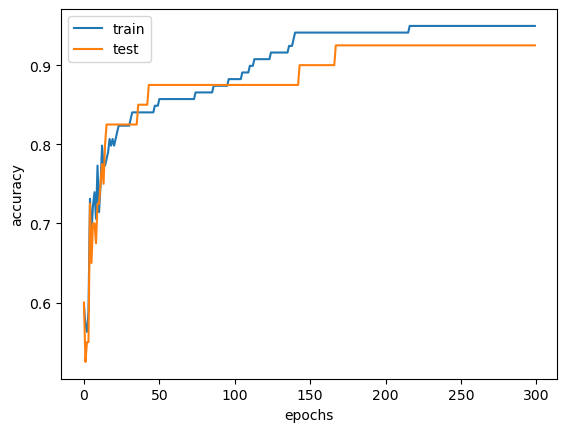

In [10]:
plt.figure()

plt.plot(train_score, label="train")
plt.plot(test_score, label='test')

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()

In [11]:
sgd = SGDClassifier(loss='log', 
                    max_iter=250, # 우리가 찾은 최적 epoch
                    tol=None, # 최소향상치 
                    random_state=4)
sgd.fit(scaled_train, y_train)
print(sgd.score(scaled_train, y_train))
print(sgd.score(scaled_test, y_test))

0.9495798319327731
0.925


- SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 자동으로 훈련을 멈추고 종료함. 
     - tol 매개변수에서 최소 향상값 지정 
     - tol이 None이 되면 자동으로 멈추지 않고 max_iter만큼 반복

In [13]:
sgd_hinge = SGDClassifier(loss='hinge',
                         max_iter=250,
                         tol=None,
                         random_state=4)
sgd_hinge.fit(scaled_train,y_train)
print(sgd_hinge.score(scaled_train,y_train))
print(sgd_hinge.score(scaled_test,y_test))

0.9495798319327731
0.925


- SGDClassifier의 loss 매개변수 기본값은 hinge(힌지 손실)임
- 힌지 손실은 support vector machine(서포트 벡터 머신)을 위한 손실 함수
- SGDClassifier는 다양한 손실함수를 지원함. 